<h1> Laboratorio 3 PDS </h1>

1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import read
rect_pulse = np.ones(20)
Rxx = np.correlate(rect_pulse, rect_pulse, mode="full")
tau = np.arange(-len(rect_pulse)+1, len(rect_pulse), 1)

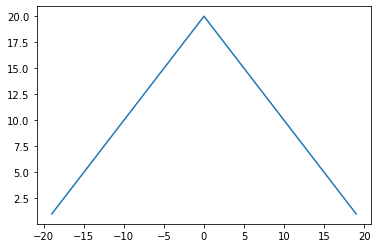

In [4]:
plt.plot(tau, Rxx)

Se puede concluir que se hizo bien el pulso, ya que la señal va creciendo monotonamente hasta 0 que es en donde está el máximo ya que allí las señales son iguales.
Al alejarse del cero disminuye el valor de la amplitud de manera monotona ya que va saliendo una señal constante haciendo que su correlación sea una linea recta

In [5]:
import utils

In [7]:
delayed_pulse = utils.delay_noise(rect_pulse)

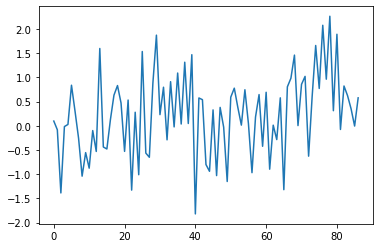

In [10]:
tau_del = np.arange(0, len(delayed_pulse), 1)
plt.plot(tau_del, delayed_pulse)

No se alcanza a distinguir de manera clara, gráficamente el retraso, está muy ruidosa la señal, no hay un patrón que podamos visualizar de manera clara que nos diga el retraso exacto

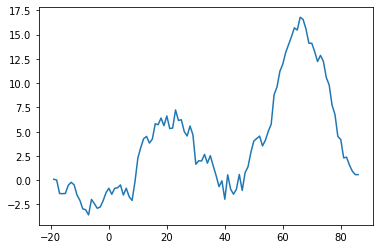

In [23]:
xcorr = np.correlate(delayed_pulse, rect_pulse, mode= "full")
tau_cor = np.arange(-len(rect_pulse)+1, len(delayed_pulse), 1)
plt.plot(tau_cor, xcorr)

Se puede observar que el retraso fue de 65 unidades de tiempo, ya que el valor máximo de la correlación se da en el punto 65 según podemos observar. Este valor puede cambiar según la ejecución el código ya que el ruido se genera aleatoriamente

In [25]:
retraso = np.argmax(xcorr)-len(rect_pulse)
print(retraso)

65


Se encontró la posición en el tiempo de la señal ruidosa primero, pero al correlacionar hay que trasladarla en el tiempo la duración del pulso cuadrado, así se encuentra la verdadera posición del retraso, tal como se pudo observar en la gráfica anterior

3)

In [38]:
arreglo = np.load("eeg.npy")

In [39]:
np.shape(arreglo)

(25, 29683)

In [40]:
canal_14 = arreglo[13]
np.shape(canal_14)

(29683,)

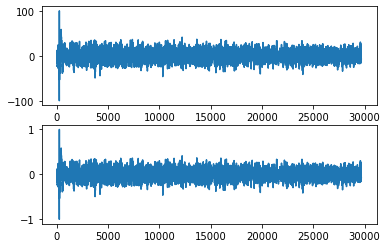

In [41]:
t = np.arange(0, len(canal_14), 1)
fig, axs = plt.subplots(2)
axs[0].plot(t, canal_14)
canal_14 = canal_14-np.mean(canal_14)
canal_14 = canal_14/np.amax(canal_14)
axs[1].plot(t, canal_14)

Se puede observar de manera clara que la forma de la señal no ha cambiado, lo que cambia es la amplitu de la señal y en una parte más pequeña, menos notable de manera gráfica, es que está desplazada en la dirección del eje "y", para eliminar también el nivel DC

<b> 3.1 </b>

In [62]:
corr_coef = []
for i in range(25):
    normalized = arreglo[i] - np.mean(arreglo[i])
    normalized = normalized/np.amax(normalized)
    current_coef = np.corrcoef(canal_14, normalized)
    tuple_ =  current_coef[:, 0]
    corr_coef.append(tuple_[1])

In [63]:
corr_coef

[0.6932158772526555,
 0.8284457769699857,
 0.8068209924578901,
 0.7726296530454685,
 0.7552196681619954,
 0.7239485490052212,
 0.885004185380401,
 0.9434191168897079,
 0.8975029765062168,
 0.8553429942173394,
 0.8096153276123257,
 0.7708820201081655,
 0.647381896285581,
 1.0,
 0.9496447987302651,
 0.8993100195510514,
 0.8439531474092025,
 0.7761628991101943,
 0.9295385277603634,
 0.8845309923077137,
 0.813378983614187,
 0.7383154631255644,
 0.16714243585422198,
 0.29895236841720213,
 0.11139570676546882]

<ipython-input-64-b02444f740a7>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(corr_coef)


<StemContainer object of 3 artists>

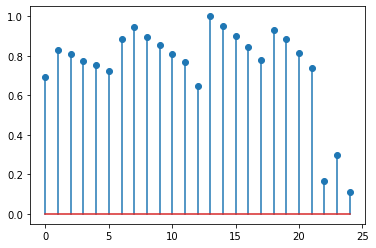

In [64]:
plt.stem(corr_coef)

Se puede observar que el valor máximo de correlación corresponde al número 13 que es la correlación del canal 14, con el canal 14 esto tiene sentido. Se puede observar así mismo que la señal formada con los coeficientes de correlación de todos los canales con el canal 14 tiene un comportamiento casi perióico. Con un periodo de 5. 
También se puede observar que hay valores pico en el intervalo de los canales 14 hasta 18, los canales con menos correlación con el canal 14 son el 23 al 25.

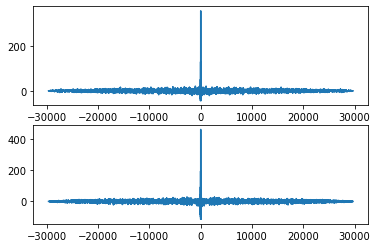

In [88]:
Rxx_14 = np.correlate(canal_14, canal_14, mode="full")
tau_14 = np.arange(-len(canal_14)+1, len(canal_14), 1)
fig, axs = plt.subplots(2)
axs[0].plot(tau_14, Rxx_14)
canal_22 = arreglo[21] - np.mean(arreglo[21])
canal_22 = canal_22/np.amax(canal_22)
Rxx_22 = np.correlate(canal_22, canal_22, mode="full")
tau_22 = np.arange(-len(canal_22)+1, len(canal_22), 1)
axs[1].plot(tau_22, Rxx_22)

Se puede observar que la forma de las autocorrelaciones son muy parecidas, pero en la función de correlación para el canal de la visión hay mayor correlación en los valores de tiempo más altos, mientras que la del canal 14 se ve que hay una mayor densidad en la  región más cercana al origen

<h1> Conclusiones </h1>
Se puede concluir con respecto a la primera parte, que aunque haya una señal enviada sin distorsión y se espere esa misma pero con distorisión por ruido y con retraso, se puede ver de manera clara dicho retraso al simplemente ver el valor máximo de la correlación cruzada de ambas señales, ya que el ruido (en este caso como se trata Gaussiano y blanco) afecta a toda la señal por igual, haciendo que la distorsión sea más o menos la misma para todas las frecuencias y que no se distorione de una manera irrecuperable la forma de la señal enviada, dando una mayor similitud donde se translapen totalmente la señal distorsionada con la original.
Para el segundo y tercer punto se puede observar que al normalizar y eliminar el nivel DC se puede hacer un análisis mejorado de la señal, ya que se anliza en sí la forma de esta y no hay distorsiones por amplitudes. También podemos ver que en el cerebro hay canales más relacionados con otros, por ejemplo en mi caso el canal 14 se relaciona mucho con los canales superiores más cercanos, pero casi nada con los de la vista por ejemplo. También se puede ver y comprobar que el valor de la autocorrelación es un pulso en el origen para señales ruidosas, tal y como se ve al final, ya que las anteriores señales tienen mucho ruido. También se puede teorizar que la ubicación de los canales o más bien la proximidad de los canales puede conducir a una mayor correlación entre dichos canales